<a href="https://colab.research.google.com/github/falahamro/Moral-Foundations-Analysis/blob/main/Moral_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Moral Foundations Application/Moral Foundations Theory Dataset/stats170_capstone_MFT_twitter_project-master/data/cleaned_scores_final.csv")
data

,mtkid,Harm,Fairness,Loyalty,Authority,Purity,ICS_score,Political Involvement,Political Leaning
0,aA3L0DCUXU11,20,20,12,19,18,4,5,conservative
1,aA3I40B0FU11,18,25,23,17,5,7,8,conservative
2,aA2MCRVU8U11,14,23,14,19,19,9,1,conservative
3,aA1PJUYJ7U11,22,25,12,16,12,-6,5,slightly
4,aA1KZ21TSU11,26,27,16,22,28,1,3,slightly
...,...,...,...,...,...,...,...,...,...
401,aA2VNK2H6U11,22,20,22,26,27,9,0,conservative
402,aA3EYWJCIU11,24,20,15,8,8,-12,5,liberal
403,aA27VBVMMU11,21,22,19,21,19,-3,0,liberal
404,aA39KKGT1U11,29,20,8,12,4,-8,1,liberal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   mtkid                  406 non-null    object
 1   Harm                   406 non-null    int64 
 2   Fairness               406 non-null    int64 
 3   Loyalty                406 non-null    int64 
 4   Authority              406 non-null    int64 
 5   Purity                 406 non-null    int64 
 6   ICS_score              406 non-null    int64 
 7   Political Involvement  406 non-null    int64 
 8   Political Leaning      406 non-null    object
dtypes: int64(7), object(2)
memory usage: 28.7+ KB


In [ ]:
data.isnull().sum()

mtkid                    0
Harm                     0
Fairness                 0
Loyalty                  0
Authority                0
Purity                   0
ICS_score                0
Political Involvement    0
Political Leaning        0
dtype: int64

In [ ]:
# num_cols that contain numerical variables

num_cols = ['Harm', 'Fairness', 'Loyalty', 'Authority', 'Purity',
       'ICS_score', 'Political Involvement']

In [ ]:
# print the descriptive stats of numerical variables

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Harm,406.0,22.463054,5.636509,-1.0,19.0,23.0,27.0,33.0
Fairness,406.0,22.509852,4.882688,2.0,20.0,23.0,26.0,32.0
Loyalty,406.0,13.758621,6.232599,-2.0,9.0,14.0,18.0,31.0
Authority,406.0,16.027094,6.759119,-1.0,12.0,17.0,21.0,33.0
Purity,406.0,12.669951,8.423039,-3.0,6.0,13.0,19.0,32.0
ICS_score,406.0,-4.177340,5.824434,-13.0,-9.0,-6.0,0.0,13.0
Political Involvement,406.0,2.975369,2.774555,-2.0,1.0,3.0,5.0,10.0


In [ ]:
# categorical variables list

cat_cols = ['Political Leaning']

In [ ]:
# print the count of each unique value in each colum

for column in cat_cols: 
  print(data[column].value_counts(normalize=True))

  print("-" * 40)

liberal         0.561576
slightly        0.295567
conservative    0.088670
moderate        0.054187
Name: Political Leaning, dtype: float64
----------------------------------------


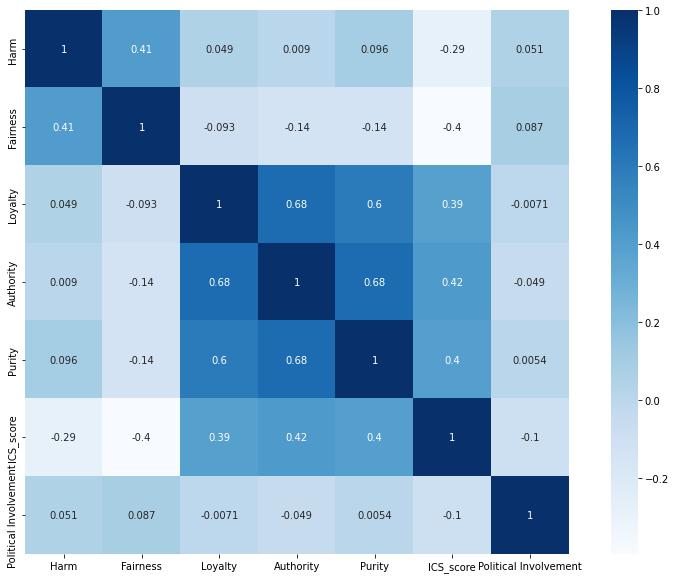

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, square=True, cmap="Blues")
plt.show()

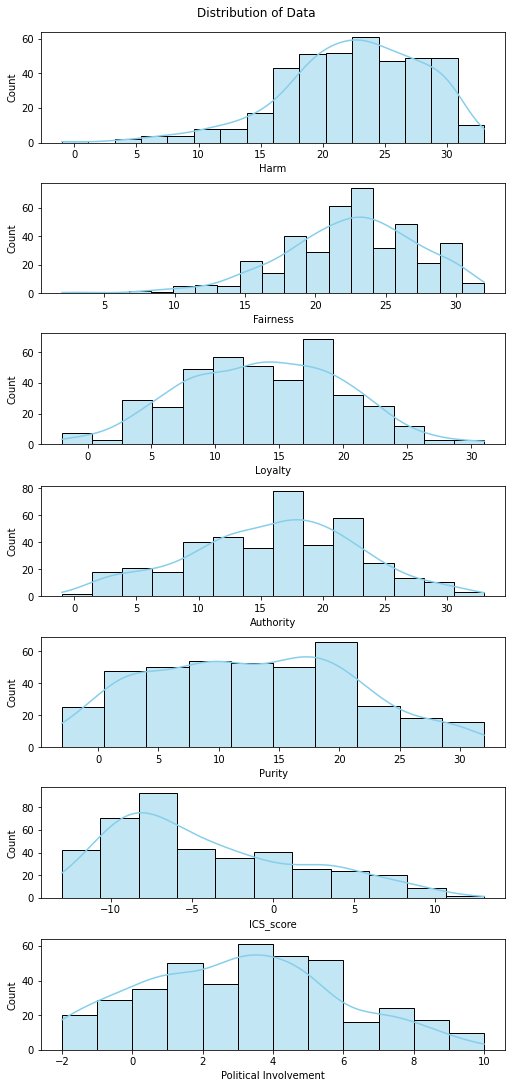

In [ ]:
cols = data.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=7,ncols=1, figsize=(7,15), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Distribution of Data")

for x, i in enumerate(cols):
    sns.histplot(x=data[i], ax=ax[x], kde=True, color=['skyblue'])

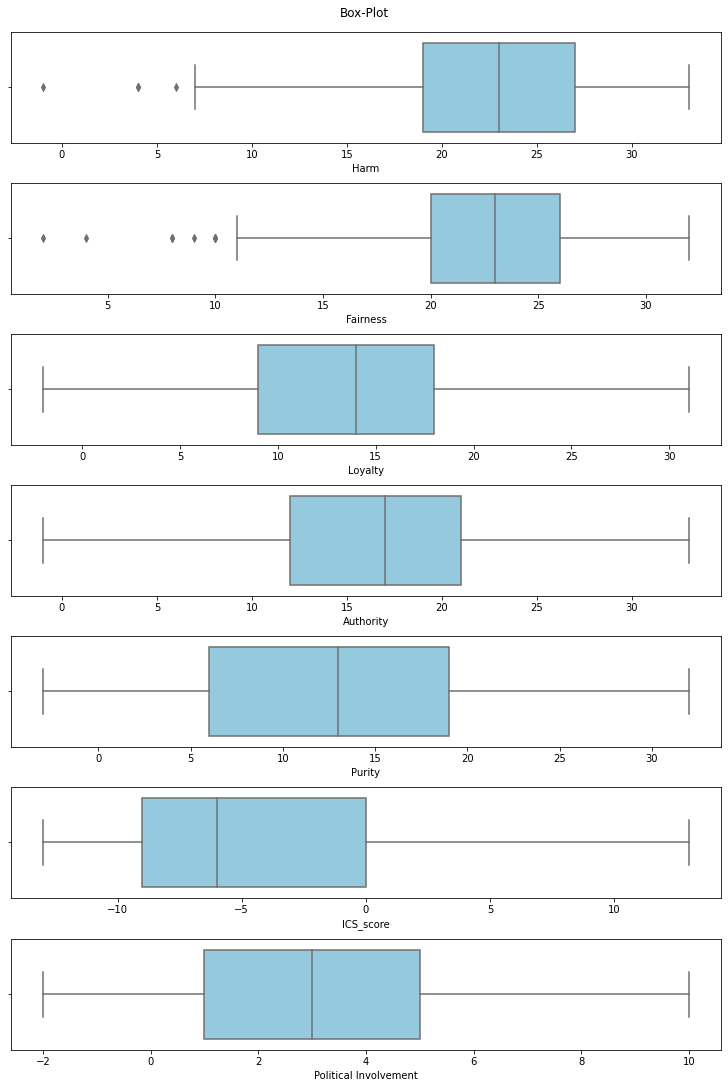

In [ ]:
#Checking outliers

cols = data.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=7,ncols=1, figsize=(10,15), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Box-Plot")
for x, i in enumerate(cols):
    sns.boxplot(x=data[i], ax=ax[x], palette=['skyblue'])

**Applying Classification/Prediction Models**

We will predict the political leaning as a our target feature

In [ ]:
data.rename(columns = {'Political Leaning': 'PoliticalLeaning'}, inplace = True)
data.rename(columns = {'Political Involvement': 'PoliticalInvolvement'}, inplace = True)

In [ ]:
data.tail()

,mtkid,Harm,Fairness,Loyalty,Authority,Purity,ICS_score,PoliticalInvolvement,PoliticalLeaning
401,aA2VNK2H6U11,22,20,22,26,27,9,0,conservative
402,aA3EYWJCIU11,24,20,15,8,8,-12,5,liberal
403,aA27VBVMMU11,21,22,19,21,19,-3,0,liberal
404,aA39KKGT1U11,29,20,8,12,4,-8,1,liberal
405,aabc123U11,28,26,11,5,3,-8,-1,liberal


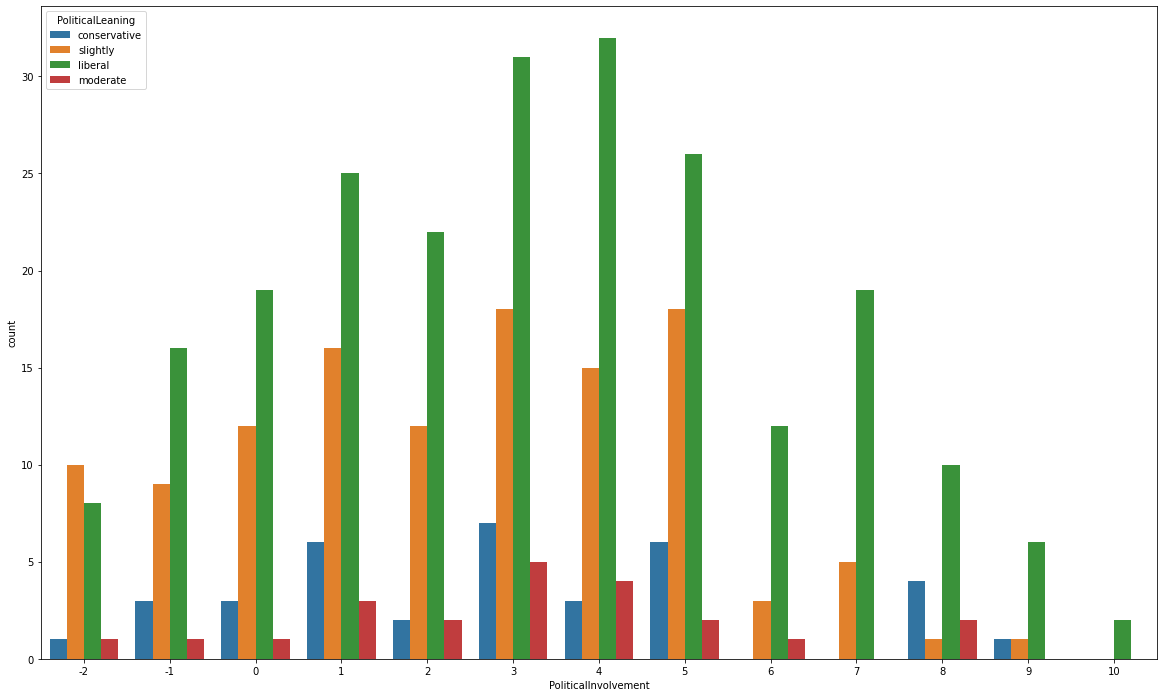

In [ ]:
fig, axarr = plt.subplots(figsize=(20, 12))
sns.countplot(x='PoliticalInvolvement', hue = 'PoliticalLeaning',data = data)

Categorical Data

In [ ]:
# change categorical variables to numeric values

data['PoliticalLeaning'].replace(['conservative', 'liberal', 'slightly', 'moderate'],
                                 [0, 1, 2, 3], inplace=True)

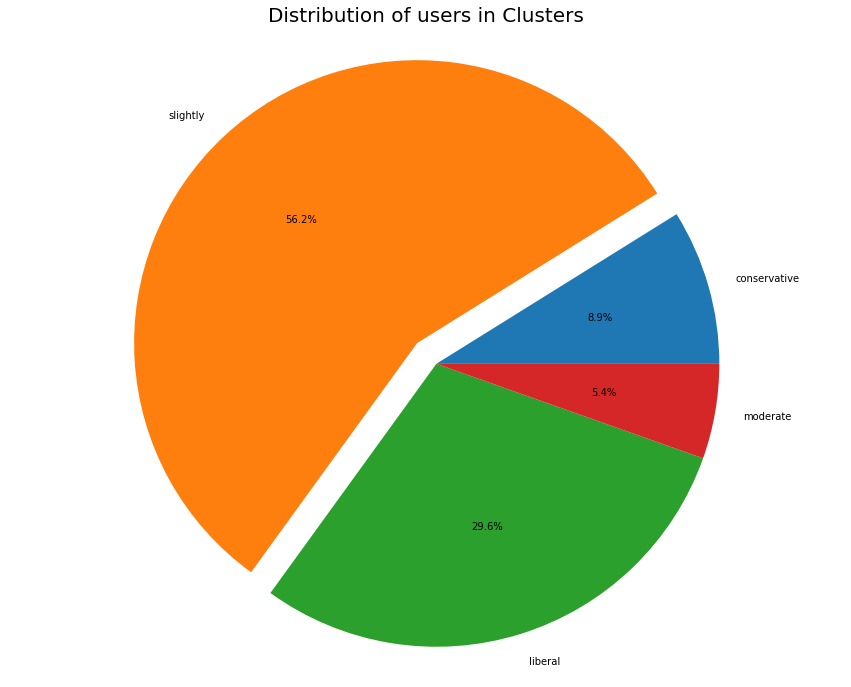

In [ ]:
# Visualize our target feature
labels = 'conservative', 'slightly', 'liberal', 'moderate'
sizes = [data.PoliticalLeaning[data['PoliticalLeaning']==0].count(), data.PoliticalLeaning[data['PoliticalLeaning']==1].count(), data.PoliticalLeaning[data['PoliticalLeaning']==2].count(), data.PoliticalLeaning[data['PoliticalLeaning']==3].count()]
fig1, ax1 = plt.subplots(figsize=(15, 12))
ax1.pie(sizes, explode=(0, 0.1, 0, 0), labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Distribution of users in Clusters", size = 20)
plt.show()

Continuous Data

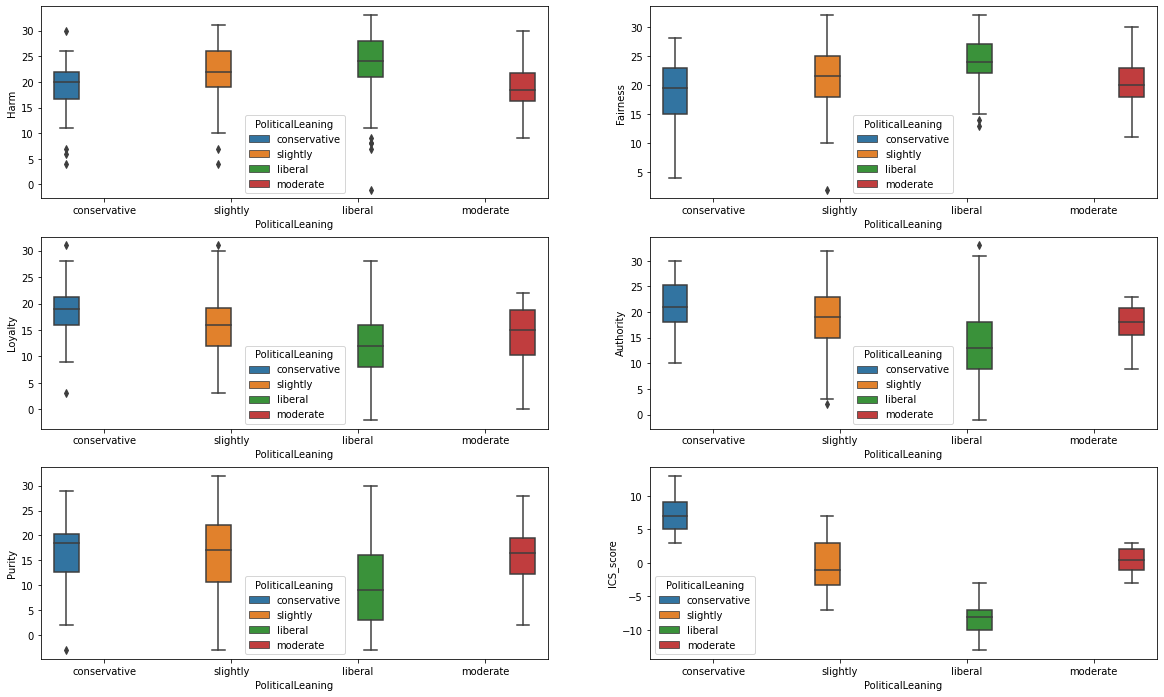

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Harm',x = 'PoliticalLeaning', hue = 'PoliticalLeaning',data = data, ax=axarr[0][0])
sns.boxplot(y='Fairness',x = 'PoliticalLeaning', hue = 'PoliticalLeaning',data = data , ax=axarr[0][1])
sns.boxplot(y='Loyalty',x = 'PoliticalLeaning', hue = 'PoliticalLeaning',data = data, ax=axarr[1][0])
sns.boxplot(y='Authority',x = 'PoliticalLeaning', hue = 'PoliticalLeaning',data = data, ax=axarr[1][1])
sns.boxplot(y='Purity',x = 'PoliticalLeaning', hue = 'PoliticalLeaning',data = data, ax=axarr[2][0])
sns.boxplot(y='ICS_score',x = 'PoliticalLeaning', hue = 'PoliticalLeaning',data = data, ax=axarr[2][1])

Liberals have the highest scores in harm.

Conservative score highest on loyalty while liberal score lowest on the purity morals.

liberals have the lowest ICS_score.



Split into dependent and independent variables

In [ ]:
# dependent feature (y)

y = data['PoliticalLeaning']

print(y)

0      conservative
1      conservative
2      conservative
3          slightly
4          slightly
           ...     
401    conservative
402         liberal
403         liberal
404         liberal
405         liberal
Name: PoliticalLeaning, Length: 406, dtype: object


In [ ]:
# Independent Features (x)

independent_features = ['Harm', 'Fairness', 'Loyalty', 'Authority', 'Purity',
       'ICS_score', 'PoliticalInvolvement']

x = data[independent_features]

x

,Harm,Fairness,Loyalty,Authority,Purity,ICS_score,PoliticalInvolvement
0,20,20,12,19,18,4,5
1,18,25,23,17,5,7,8
2,14,23,14,19,19,9,1
3,22,25,12,16,12,-6,5
4,26,27,16,22,28,1,3
...,...,...,...,...,...,...,...
401,22,20,22,26,27,9,0
402,24,20,15,8,8,-12,5
403,21,22,19,21,19,-3,0
404,29,20,8,12,4,-8,1


Normalize continuous variables using standard scaler

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x

array([[-0.43752135, -0.51466504, -0.28251302, ...,  0.63357482,
         1.40570389,  0.73061385],
       [-0.79278868,  0.51062449,  1.48457822, ..., -0.91171534,
         1.92141092,  1.81320225],
       [-1.50332335,  0.10050868,  0.0387763 , ...,  0.75244329,
         2.2652156 , -0.71283736],
       ...,
       [-0.25988768, -0.10454923,  0.84199959, ...,  0.75244329,
         0.20238749, -1.07370016],
       [ 1.16118165, -0.51466504, -0.92509165, ..., -1.03058381,
        -0.65712423, -0.71283736],
       [ 0.98354799,  0.7156824 , -0.44315768, ..., -1.14945228,
        -0.65712423, -1.43456296]])

Split into train and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 7)
(122, 7)
(284,)
(122,)


**Apply ML Algorithms**

Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ypred=lr.predict(x_test)
lr_acc = sklearn.metrics.accuracy_score(lr_ypred,y_test)
print("Logistic Regression Accuracy: ")
print(lr_acc*100,"%")

Logistic Regression Accuracy: 
81.9672131147541 %


Navie Bayes

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_ypred=nb.predict(x_test)
nb_acc = sklearn.metrics.accuracy_score(nb_ypred,y_test)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

Naive Bayes Accuracy: 
80.32786885245902 %


Stochastic Gradient Descent

In [ ]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train,y_train)
sgd_ypred=sgd.predict(x_test)
sgd_acc = sklearn.metrics.accuracy_score(sgd_ypred,y_test)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

Stochastic Gradient Descent Accuracy: 
80.32786885245902 %


K-Nearest Neighbours

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_ypred=knn.predict(x_test)
knn_acc = sklearn.metrics.accuracy_score(knn_ypred,y_test)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

K-Nearest Neighbour Accuracy: 
69.67213114754098 %


Decision Tree

In [ ]:
dtree=DecisionTreeClassifier(max_depth=100,random_state=10,max_features=None, min_samples_leaf=100)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_acc = sklearn.metrics.accuracy_score(dtree_ypred,y_test)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
72.95081967213115 %


Random Forest

In [ ]:
rfm=RandomForestClassifier(n_estimators=200,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train,y_train)
rfm_ypred=rfm.predict(x_test)
rfm_acc = sklearn.metrics.accuracy_score(rfm_ypred,y_test)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

Random Forest Accuracy: 
81.14754098360656 %


Support Vector Machine

In [ ]:
svm=SVC(kernel="linear",C=0.025,random_state=None)
svm.fit(x_train,y_train)
svm_ypred=svm.predict(x_test)
svm_acc = sklearn.metrics.accuracy_score(svm_ypred,y_test)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

Support Vector Machine Accuracy: 
75.40983606557377 %


**ML Model Evaluation**

Classification Report

In [ ]:
targetNames=['conservative', 'slightly', 'liberal', 'moderate']
print('For LR')
print(classification_report(y_test, lr_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Naive Bayes')
print(classification_report(y_test, nb_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SGD')
print(classification_report(y_test, sgd_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For KNN')
print(classification_report(y_test, knn_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Decision Tree')
print(classification_report(y_test, dtree_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Random Forest')
print(classification_report(y_test, rfm_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SVM')
print(classification_report(y_test, svm_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')

For LR
              precision    recall  f1-score   support

conservative       0.81      0.93      0.87        14
    slightly       0.92      0.92      0.92        65
     liberal       0.00      0.00      0.00         8
    moderate       0.66      0.77      0.71        35

    accuracy                           0.82       122
   macro avg       0.60      0.66      0.63       122
weighted avg       0.77      0.82      0.80       122

-----------------------------------------------------------------
For Naive Bayes
              precision    recall  f1-score   support

conservative       0.74      1.00      0.85        14
    slightly       0.95      0.88      0.91        65
     liberal       0.00      0.00      0.00         8
    moderate       0.63      0.77      0.69        35

    accuracy                           0.80       122
   macro avg       0.58      0.66      0.61       122
weighted avg       0.77      0.80      0.78       122

-----------------------------------------

In [ ]:
cm_lr = confusion_matrix(y_test, lr_ypred)
print('For Logistic Regression')
print('Confusion Matrix: ')
print(cm_lr)
acc_lr = accuracy_score(y_test, lr_ypred)
pre_lr = precision_score(y_test, lr_ypred, average='micro')
rec_lr = recall_score(y_test, lr_ypred, average='micro')
f1_lr = f1_score(y_test, lr_ypred, average='micro')
print('Accuracy Score: ',acc_lr)
print('Precision Score: ',pre_lr)
print('Recall Score: ',rec_lr)
print('F1 Score: ',f1_lr)

For Logistic Regression
Confusion Matrix: 
[[13  0  0  1]
 [ 0 60  0  5]
 [ 0  0  0  8]
 [ 3  5  0 27]]
Accuracy Score:  0.819672131147541
Precision Score:  0.819672131147541
Recall Score:  0.819672131147541
F1 Score:  0.819672131147541


In [ ]:
cm_nb = confusion_matrix(y_test, nb_ypred)
print('For Naive Bayes')
print('Confusion Matrix: ')
print(cm_nb)
acc_nb = accuracy_score(y_test, nb_ypred)
pre_nb = precision_score(y_test, nb_ypred, average='micro')
rec_nb = recall_score(y_test, nb_ypred, average='micro')
f1_nb = f1_score(y_test, nb_ypred, average='micro')
print('Accuracy Score: ',acc_nb)
print('Precision Score: ',pre_nb)
print('Recall Score: ',rec_nb)
print('F1 Score: ',f1_nb)

For Naive Bayes
Confusion Matrix: 
[[14  0  0  0]
 [ 0 57  0  8]
 [ 0  0  0  8]
 [ 5  3  0 27]]
Accuracy Score:  0.8032786885245902
Precision Score:  0.8032786885245902
Recall Score:  0.8032786885245902
F1 Score:  0.8032786885245902


In [ ]:
cm_sgd = confusion_matrix(y_test, sgd_ypred)
print('For Stochastic Gradient Descent')
print('Confusion Matrix: ')
print(cm_sgd)
acc_sgd = accuracy_score(y_test, sgd_ypred)
pre_sgd = precision_score(y_test, sgd_ypred, average='micro')
rec_sgd = recall_score(y_test, sgd_ypred, average='micro')
f1_sgd = f1_score(y_test, sgd_ypred, average='micro')
print('Accuracy Score: ',acc_sgd)
print('Precision Score: ',pre_sgd)
print('Recall Score: ',rec_sgd)
print('F1 Score: ',f1_sgd)

For Stochastic Gradient Descent
Confusion Matrix: 
[[14  0  0  0]
 [ 0 61  0  4]
 [ 2  0  0  6]
 [ 7  5  0 23]]
Accuracy Score:  0.8032786885245902
Precision Score:  0.8032786885245902
Recall Score:  0.8032786885245902
F1 Score:  0.8032786885245902


In [ ]:
cm_knn = confusion_matrix(y_test, knn_ypred)
print('For KNN')
print('Confusion Matrix: ')
print(cm_knn)
acc_knn = accuracy_score(y_test, knn_ypred)
pre_knn = precision_score(y_test, knn_ypred, average='micro')
rec_knn = recall_score(y_test, knn_ypred, average='micro')
f1_knn = f1_score(y_test, knn_ypred, average='micro')
print('Accuracy Score: ',acc_knn)
print('Precision Score: ',pre_knn)
print('Recall Score: ',rec_knn)
print('F1 Score: ',f1_knn)

For KNN
Confusion Matrix: 
[[ 8  0  0  6]
 [ 0 61  0  4]
 [ 4  1  0  3]
 [ 6 10  3 16]]
Accuracy Score:  0.6967213114754098
Precision Score:  0.6967213114754098
Recall Score:  0.6967213114754098
F1 Score:  0.6967213114754098


In [ ]:
cm_dtree = confusion_matrix(y_test, dtree_ypred)
print('For Decision Tree')
print('Confusion Matrix: ')
print(cm_dtree)
acc_dtree = accuracy_score(y_test, dtree_ypred)
pre_dtree = precision_score(y_test, dtree_ypred, average='micro')
rec_dtree = recall_score(y_test, dtree_ypred, average='micro')
f1_dtree = f1_score(y_test, dtree_ypred, average='micro')
print('Accuracy Score: ',acc_dtree)
print('Precision Score: ',pre_dtree)
print('Recall Score: ',rec_dtree)
print('F1 Score: ',f1_dtree)

For Decision Tree
Confusion Matrix: 
[[ 0  0  0 14]
 [ 0 58  0  7]
 [ 0  0  0  8]
 [ 0  4  0 31]]
Accuracy Score:  0.7295081967213115
Precision Score:  0.7295081967213115
Recall Score:  0.7295081967213115
F1 Score:  0.7295081967213115


In [ ]:
cm_rfm = confusion_matrix(y_test, rfm_ypred)
print('For Random Forest')
print('Confusion Matrix: ')
print(cm_rfm)
acc_rfm = accuracy_score(y_test, rfm_ypred)
pre_rfm = precision_score(y_test, rfm_ypred, average='micro')
rec_rfm = recall_score(y_test, rfm_ypred, average='micro')
f1_rfm = f1_score(y_test, rfm_ypred, average='micro')
print('Accuracy Score: ',acc_rfm)
print('Precision Score: ',pre_rfm)
print('Recall Score: ',rec_rfm)
print('F1 Score: ',f1_rfm)

For Random Forest
Confusion Matrix: 
[[12  0  0  2]
 [ 0 59  0  6]
 [ 0  0  0  8]
 [ 5  2  0 28]]
Accuracy Score:  0.8114754098360656
Precision Score:  0.8114754098360656
Recall Score:  0.8114754098360656
F1 Score:  0.8114754098360656


In [ ]:
accuracies= {"LR": lr_acc, 
             "Naive": nb_acc, 
             "SGD": sgd_acc, 
             "kNN": knn_acc, 
             "DT": dtree_acc, 
             "RFM": rfm_acc, 
             }

precisions = {"LR": pre_lr,  
             "Naive": pre_nb, 
             "SGD": pre_sgd,
             "kNN": pre_knn, 
             "DT": pre_dtree,
            "RFM": pre_rfm,
             }

recalls = {"LR": rec_lr,  
             "Naive": rec_nb, 
             "SGD": rec_sgd,
             "kNN": rec_knn, 
             "DT": rec_dtree,
            "RFM": rec_rfm,
             }

f1s = {"LR": f1_lr,  
        "Naive": f1_nb, 
        "SGD": f1_sgd,
        "kNN": f1_knn, 
        "DT": f1_dtree,
      "RFM": f1_rfm,
        }

**Classification Evaluation Metrics**

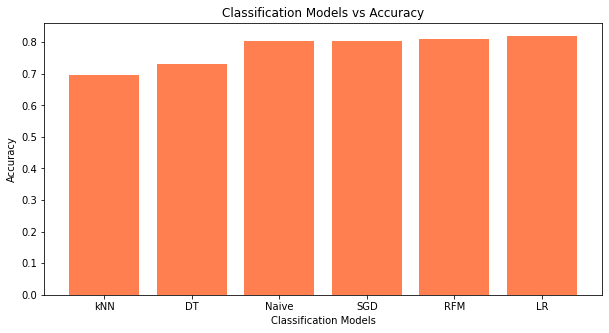

In [ ]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="coral")
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

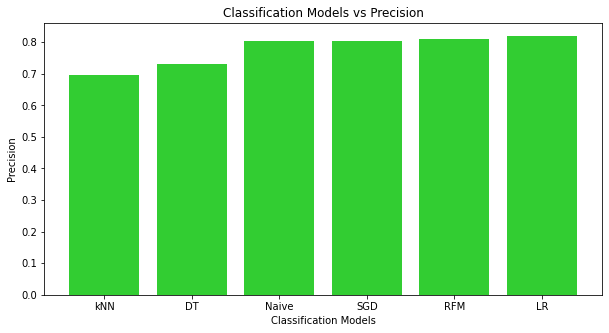

In [ ]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="limegreen")
plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

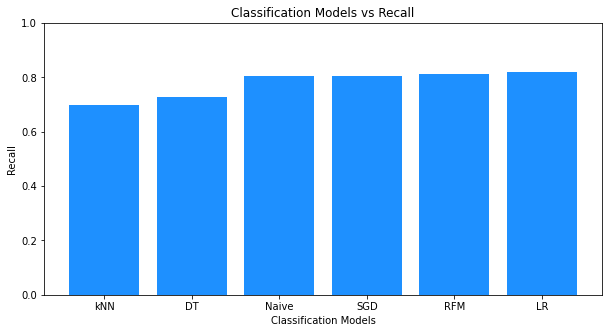

In [ ]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="dodgerblue")
plt.ylim(0,1)
plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

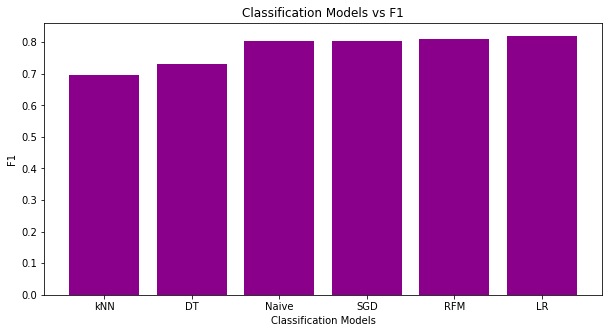

In [ ]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="darkmagenta")
plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

**Apply Deep Learning Models**

Artificial Neural Networks

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.fit(x_train,y_train,batch_size=32,epochs=100)
acc= ann_model.evaluate(x_train, y_train)
print("ANN Model Accuracy: ")
ann_acc=acc[1]
print(ann_acc*100,"%")

Epoch 1/100


UnimplementedError: ignored

Additional reshaping for CNN and LSTM

In [ ]:
x_train = np.random.uniform(0,1, (7000,10))
y_train = np.random.randint(0,2, 7000)

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)

Convolutional Neural Networks

In [ ]:
inp = Input(shape=(1,10))
conv2 = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(inp)
drop21 = Dropout(0.5)(conv2)
conv22 = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(drop21)
drop22 = Dropout(0.5)(conv22)
pool2 = Flatten()(drop22)
out = Dense(2, activation='softmax')(pool2)
cnn_model = Model(inp, out)
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, epochs=100)
acc= cnn_model.evaluate(x_train, y_train)
print("CNN Model Accuracy: ")
cnn_acc=acc[1]
print(cnn_acc*100,"%")

Long Short-Term Memory RNN

In [ ]:
lstm_model=Sequential()
lstm_model.add(Bidirectional(LSTM(100, return_sequences=False), input_shape=(1, 10)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(lstm_model.summary())
#history = lstm_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)
acc= lstm_model.evaluate(x_train, y_train)
print("LSTM Model Accuracy: ")
lstm_acc=acc[1]
print(lstm_acc*100,"%")

**DL Model Evaluation**

In [ ]:
accuracies= {"ANN": ann_acc, 
             "CNN": cnn_acc, 
             "LSTM": lstm_acc, 
             }
lists = sorted(accuracies.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="aquamarine")
plt.title('Deep Learning Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()